# Week 7 Laboratory Activity

Many of the principles and theories of statistical machine learning are about the behaviour of
different learning algorithms with varying amounts of data. This week, we will explore
classification using the Decision Trees (DT) algorithm, clustering using the k-means
algorithm (k-means), and be exposed to various cloud machine learning services.

Work through Week 7 Laboratory Activities to experiment with different aspects of Decision
Trees (DT), Random Forest (RF) and K-means within the Jupyter Notebook environment.
Share with other students and tutor your findings (during your tutorial session) from the
activities. You are also encouraged to discussion among yourselves or with your tutors on
your thoughts on these algorithms in the Moodle forums:

Activity 1: Classification and Decision trees and Random forest as two examples.<br>
Activity 2: Clustering and K-means algorithm as an example.<br>
Activity 3 (Optional): Using Cloud Services, such as GCP, AWS, Azure, Aliyun, DataRobots

# Activity 1: Classification

We are going to start this week’s practical with classification, which in machine learning, it
part of the supervised learning style (as per Lectures in Week 5)

One of the main things to note for supervised learning is that there is a train and test
datasets (we won’t look at validation datasets in this Unit).

For this activity, we will be attempting to predict whether a person has travelled abroad
based on the person’s age and income. Let’s start with the usual importing of the necessary
libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('TravelInfo.csv')

Investigate the content of the dataset (as we would normally).

In [2]:
print(dataset.shape)
dataset.head(5)

(400, 3)


,Age,Income,TravelAbroad
0,22,25000,0
1,38,26000,0
2,29,49000,0
3,30,63000,0
4,22,82000,0


The dataset should have 400 rows and 3 columns. The columns should be ‘Age’, ‘Income’
and ‘TravelAbroad’. This is a record of past incidences or survey data. As the intention is to
build a model, we are going to use this as the training data.

Practice 1: If we use the whole dataset as the training data, how do we know how good our
model is?
<hr>
Answer: We won't. We can only know how good our model is if we introduce new unseen data to the model. Usually, we won't need this step if we have a test set. Which is about 30% of your prepared dataset.

We proceed to split the dataset into input data and their corresponding labeled data. The
first two columns are the input data, i.e. the ‘Age’ and the ‘Income’ of which we would like to
predict if the person has ‘TravelAbroad’ before. From the past survey data collected, we
have some samples and this ‘TravelAbroad’ is the respective labeled data. Let’s split the
data into X, the input data and y, the labeled data.

In [3]:
X = dataset.iloc[:, [0, 1]].values # Input Data: Age and Income
y = dataset.iloc[:, 2].values # Labeled Data: Travelled or not

You can review what X and y consists of. Since, we need to reserve a portion of the dataset
for testing data, we can either simply take a portion of the data or a better way is take from a
“random” sample of the data. Assuming that we want to keep 75% for the training data and
25% for the testing data. We can use the function <code>train_test_split()</code> from
<code>sklearn.model_selection</code>.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size = 0.3, random_state = 0
)

## Feature Scaling or Normalizaton

Since the range of values of raw data varies widely, in some machine learning algorithms,
objective functions will not work properly without feature scaling (a.k.a. normalization). For
example, many classifiers calculate the distance between two points by the Euclidean
distance. If one of the features has a broad range of values, the distance will be governed
(heavily influenced) by this particular feature. Therefore, the range of all features should be
normalized in order for each feature to contribute proportionately to the final distance. In
addition, our motivation here is to visualise the feature space later on.

Again, we use a built in function ```StandardScaler()``` from ```sklearn.preprocessing``` to do this.
Note that we apply the ```fit_transform()``` to the training dataset and not the test dataset.
The reason is that we want to scale it to have a mean of 0 and a certain standard deviation.
The mean and standard deviation values will be stored in the ```StandardScaler()``` and
applied to the testing dataset using the ```transform()```.

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train and Test using Decision Tree Algorithm

Now, our data is ready to be used to build the model. Note that, in reality, we will usually
need to read and wrangle the data before we even start to normalize or standardize the data
(although this stage does not necessarily occur in all cases). Let’s use the Decision Tree
algorithm, from ```sklearn.tree```’s ```DecisionTreeClassifier()``` function.

In [6]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
 criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Normally, when we want to build a model, most functions will have a method called <code>fit()</code>
(note that this is not standard but many functions use this). At the end of running that code,
we now have a model using the Decision Tree algorithm and the model is called
classifier. Since we now have a model built, let’s test how well our model is. We firstly
use the built model with the testing input data (not labels as that’s the output that we want to
check against what we already know). We use the method <code>predict()</code> in the model. Note
that this method’s name is also quite common with other built-in functions for models, but
many also do call this <code>pred()</code>.

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

We now have a set of labels, y_pred, that is the output from the prediction of using our
testing data. We now need to compare this y_pred with the actual y_test (the true value)
and determine the accuracy of our model’s prediction. To do so, we want to view it using a
confusion matrix (covered in your lectures). This is an important concept for classifier
comparison.

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  9],
       [ 4, 37]], dtype=int64)

Your confusion matrix will be shown as a 2 by 2 matrix.

Practise 2: From the confusion matrix output, discuss what are the values of True Negative,
True Positives, False Negative, and False Positive. Other than accuracy, would precision or
recall be a better measure for this particular case?

<hr style = "color: black">

## Visualise (Optional)

We will take this opportunity to introduce a new visualisation, called the meshgrid. For this
demonstration, we will look at the test results in the feature space. You do not need to know
the syntax or how it works. This is just for illustration.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


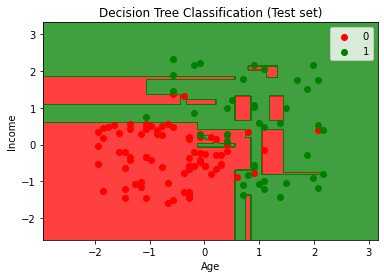

In [9]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
     np.arange(
     start = X_set[:, 0].min() - 1,
     stop = X_set[:, 0].max() + 1,
     step = 0.01
     ),
     np.arange(
     start = X_set[:, 1].min() - 1,
     stop = X_set[:, 1].max() + 1,
     step = 0.01
     )
    )
plt.contourf(
 X1,
 X2,
 classifier.predict(
 np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75,
 cmap = ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(
     X_set[y_set == j, 0],
     X_set[y_set == j, 1],
     c = ListedColormap(('red', 'green'))(i),
     label = j
     )

plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

## Train and Test using Random Forest Algorithm

Another classifier is the random forests algorithm, which in essence consists of multiple
trees, each based on a random sample of the training data. They usually perform rather
well. Let’s now fit a Random Forest Classification to the Training set. The concepts are
similar to the above, just that we call a different model. All the reading of data, splitting of
data and data normalization has been done above.

In [10]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
 n_estimators = 100,
 criterion = 'entropy',
 random_state = 0
)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[72,  7],
       [ 5, 36]], dtype=int64)

In [11]:
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

NameError: name 'sklearn' is not defined

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))